In [2]:
#Loading dataset
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

4


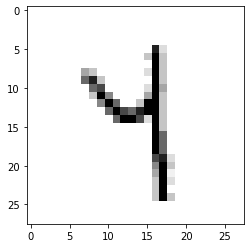

In [3]:
#Showing a randomly selected data in grayscale
import matplotlib.pyplot as plt
%matplotlib inline 
image_index = 1004 # You may select anything up to 60,000
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys')

In [4]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [5]:
# Importing the required Keras modules containing model and layers
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Using TensorFlow backend.
W0705 21:26:57.575284 140013475039040 deprecation_wrapper.py:119] From /home/abu/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0705 21:26:57.687368 140013475039040 deprecation_wrapper.py:119] From /home/abu/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0705 21:26:57.719675 140013475039040 deprecation_wrapper.py:119] From /home/abu/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0705 21:26:57.764719 140013475039040 deprecation_wrapper.py:119] From /home/abu/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend

In [6]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

W0705 21:27:02.018305 140013475039040 deprecation_wrapper.py:119] From /home/abu/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0705 21:27:02.080857 140013475039040 deprecation_wrapper.py:119] From /home/abu/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.

W0705 21:27:02.363876 140013475039040 deprecation.py:323] From /home/abu/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
60000/60000 [==============================] - 76s 1ms/step - loss: 0.2015 - acc: 0.9398
Epoch 2/10
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0815 - acc: 0.9739
Epoch 3/10
60000/60000 [==============================] - 92s 2ms/step - loss: 0.0556 - acc: 0.9819
Epoch 4/10
60000/60000 [==============================] - 100s 2ms/step - loss: 0.0438 - acc: 0.9855
Epoch 5/10
60000/60000 [==============================] - 90s 2ms/step - loss: 0.0344 - acc: 0.9888
Epoch 6/10
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0271 - acc: 0.9907
Epoch 7/10
60000/60000 [==============================] - 78s 1ms/step - loss: 0.0247 - acc: 0.9915
Epoch 8/10
60000/60000 [==============================] - 79s 1ms/step - loss: 0.0215 - acc: 0.9927
Epoch 9/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0179 - acc: 0.9937
Epoch 10/10
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0173 - acc: 0.994

In [7]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 6s 633us/step


[0.06364150557509565, 0.9847]

4


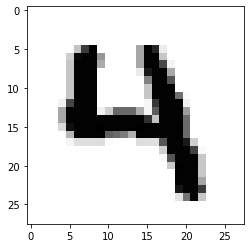

In [13]:
image_index = 405
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())